##### LogisticRegressionCellType code for the cross-studies neuronal cell comparison (6-17PCW). Adapted from PengHe : https://github.com/brianpenghe/python-genomics/blob/master/Scanpyplus.py

In [ ]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc

In [8]:
from datetime import date
def LogisticRegressionCellType(Reference, Query, Category = 'louvain', DoValidate = False,\
    multi_class='multinomial',n_jobs=-1,max_iter=1000,tol=1e-4,keyword=''):
    #This function doesn't do normalization or scaling
    #The logistic regression function returns the updated Query object with predicted info stored
    Reference.var_names_make_unique()
    Query.var_names_make_unique()
    IntersectGenes = np.intersect1d(Reference.var_names,Query.var_names)
    Reference2 = Reference[:,IntersectGenes]
    Query2 = Query[:,IntersectGenes]
    X = Reference2.X
    y = Reference2.obs[Category].replace(np.nan,'None',regex=True)
    x = Query2.X
    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    logit = LogisticRegression(penalty='l2',
                           random_state=42,
                           C=0.2,
                           tol=tol,
                           n_jobs=n_jobs,
                           solver='sag',
                           multi_class=multi_class,
                           max_iter=max_iter,
                           verbose=10
                          )
    result=logit.fit(X, y)
    y_predict=result.predict(x)
    today = date.today()
    if DoValidate is True:
        scores = cross_val_score(logit, X, y, cv=cv)
        print(scores)
    _ = joblib.dump(result,str(today)+'Sklearn.result.'+keyword+'.pkl',compress=9)
    np.savetxt(str(today)+'Sklearn.result.'+keyword+'.csv',IntersectGenes,fmt='%s',delimiter=',')
    Query.obs['Predicted'] = y_predict
    return Query

In [6]:
oxford = sc.read('/mnt/2021Jan02/mouse/ox_neuronal.h5ad')

In [4]:
adata_comb = sc.read("/mnt/2021Jan02/neuronal_ENS_combined03.h5ad")

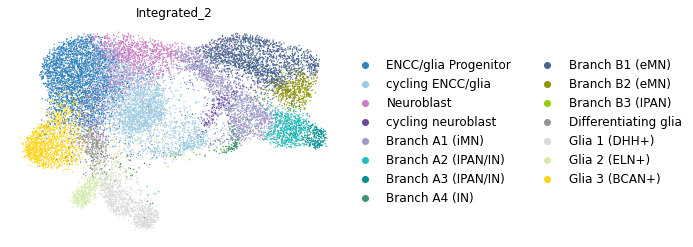

In [5]:
sc.pl.umap(adata_comb, color=["Integrated_2"],cmap="OrRd",add_outline=False, 
           legend_fontsize=12, legend_fontoutline=2,frameon=False)

In [10]:
adata8= LogisticRegressionCellType(oxford,adata_comb,Category='Cluster',n_jobs=15,
                                           DoValidate=True,tol=1e-4,max_iter=1000,
                                           multi_class='ovr')

[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.


convergence after 173 epochs took 2 seconds
convergence after 171 epochs took 2 seconds
convergence after 180 epochs took 2 seconds
convergence after 182 epochs took 2 seconds


[Parallel(n_jobs=15)]: Done   2 out of  13 | elapsed:    1.8s remaining:    9.9s
[Parallel(n_jobs=15)]: Done   4 out of  13 | elapsed:    1.9s remaining:    4.3s
[Parallel(n_jobs=15)]: Done   6 out of  13 | elapsed:    2.0s remaining:    2.3s


convergence after 193 epochs took 2 seconds
convergence after 179 epochs took 2 seconds
convergence after 192 epochs took 2 seconds
convergence after 196 epochs took 2 seconds
convergence after 202 epochs took 2 seconds


[Parallel(n_jobs=15)]: Done   8 out of  13 | elapsed:    2.1s remaining:    1.3s
[Parallel(n_jobs=15)]: Done  10 out of  13 | elapsed:    2.2s remaining:    0.7s


convergence after 211 epochs took 2 seconds
convergence after 229 epochs took 3 seconds
convergence after 235 epochs took 3 seconds
convergence after 248 epochs took 3 seconds


[Parallel(n_jobs=15)]: Done  13 out of  13 | elapsed:    2.7s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  13 | elapsed:    2.1s remaining:   11.7s
[Parallel(n_jobs=15)]: Done   4 out of  13 | elapsed:    2.2s remaining:    5.0s
[Parallel(n_jobs=15)]: Done   6 out of  13 | elapsed:    2.2s remaining:    2.6s
[Parallel(n_jobs=15)]: Done   8 out of  13 | elapsed:    2.3s remaining:    1.5s
[Parallel(n_jobs=15)]: Done  10 out of  13 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=15)]: Done  13 out of  13 | elapsed:    3.1s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  13 | elapsed:    1.3s remaining:    7.0s
[Parallel(n_jobs=15)]: Done   4 out of  13 | elapsed:    1.5s remaining:    3.3s
[Parallel(n_jobs=15)]: Done   6 out of  13 | elapsed:    1.6s remaining:    1.8s
[Parallel(n_jobs=15)]: Done   8 out of  13 | elapsed:   

[0.8504222  0.90229192 0.86248492 0.86851628 0.87077295]


[Parallel(n_jobs=15)]: Done  13 out of  13 | elapsed:    2.4s finished


In [11]:
oxford.obs['Cluster'].cat.reorder_categories([
 'Glial Progenitors',
 'ENS Progenitors',
'Submucosal Glial', 'Intraganglionic Glial', 'Differentiating Submucosal Glial', 'Lymphoid Associated Glial',
 'Inhibitory Motor Neuron Precursor',
 'Inhibitory Motor Neuron', 'Excitory Motor Neuron',
 'Interneuron',
 'Neuroendocrine (1)', 'Neuroendocrine (2)','Neural G2M- & S-phase'], inplace = True)

... storing 'Predicted' as categorical


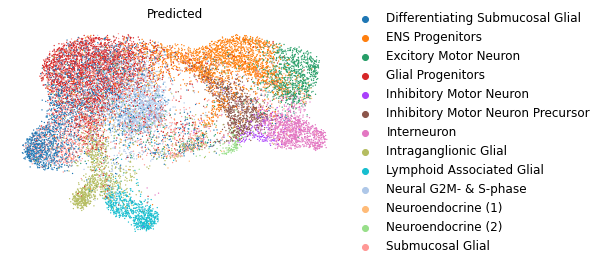

In [12]:
sc.pl.umap(adata8, color=["Predicted"],cmap="OrRd",add_outline=False, 
           legend_fontsize=12, legend_fontoutline=2,frameon=False)

In [13]:
adata8.obs['Predicted'].cat.reorder_categories([
 'Glial Progenitors',
 'ENS Progenitors',
'Submucosal Glial', 'Intraganglionic Glial', 'Differentiating Submucosal Glial', 'Lymphoid Associated Glial',
 'Inhibitory Motor Neuron Precursor',
 'Inhibitory Motor Neuron', 'Excitory Motor Neuron',
 'Interneuron',
 'Neuroendocrine (1)', 'Neuroendocrine (2)','Neural G2M- & S-phase'], inplace = True)

In [14]:
df = pd.crosstab(adata8.obs["Predicted"],adata8.obs["Integrated_2"] )
cols = list(df.columns)
df[cols] =df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)
df

Integrated_2,ENCC/glia Progenitor,cycling ENCC/glia,Neuroblast,cycling neuroblast,Branch A1 (iMN),Branch A2 (IPAN/IN),Branch A3 (IPAN/IN),Branch A4 (IN),Branch B1 (eMN),Branch B2 (eMN),Branch B3 (IPAN),Differentiating glia,Glia 1 (DHH+),Glia 2 (ELN+),Glia 3 (BCAN+)
Predicted,,,,,,,,,,,,,,,
Glial Progenitors,55.858586,11.447811,23.973064,0.101010,1.077441,0.067340,0.000000,0.067340,0.673401,0.101010,0.000000,2.794613,0.875421,0.202020,2.760943
ENS Progenitors,2.279202,2.767603,16.483516,4.680505,19.983720,0.081400,0.000000,0.122100,50.712251,2.157102,0.040700,0.081400,0.244200,0.081400,0.284900
Submucosal Glial,29.404617,22.964763,10.206561,0.607533,3.280680,0.972053,0.607533,0.000000,1.458080,0.911300,0.060753,3.159174,0.425273,0.243013,25.698663
Intraganglionic Glial,8.607784,14.446108,1.422156,0.523952,0.898204,0.074850,0.000000,0.748503,0.449102,0.149701,0.000000,19.985030,12.350299,38.173653,2.170659
Differentiating Submucosal Glial,30.428954,17.158177,7.774799,0.000000,1.072386,0.491510,0.000000,0.089366,0.759607,0.134048,0.044683,1.787310,0.536193,0.268097,39.454870
Lymphoid Associated Glial,0.793651,1.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132275,97.751323,0.132275,0.000000
Inhibitory Motor Neuron Precursor,0.422833,1.691332,2.008457,0.951374,88.794926,0.422833,0.000000,0.951374,4.016913,0.634249,0.105708,0.000000,0.000000,0.000000,0.000000
Inhibitory Motor Neuron,0.000000,4.790419,0.000000,0.000000,77.245509,16.766467,0.000000,0.000000,0.598802,0.000000,0.000000,0.000000,0.598802,0.000000,0.000000
Excitory Motor Neuron,0.674374,9.055877,0.289017,1.059730,1.445087,0.578035,0.192678,0.096339,54.238921,31.599229,0.481696,0.000000,0.096339,0.192678,0.000000


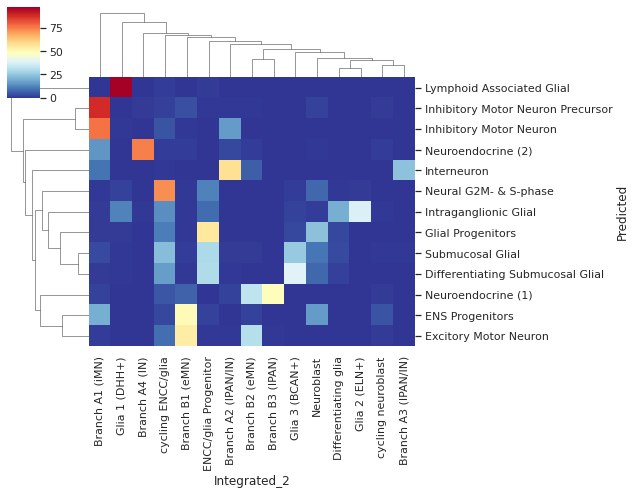

In [15]:
import seaborn as sns; sns.set(color_codes=True)
sns.clustermap(df, col_cluster=True, cmap="RdYlBu_r", row_cluster=True, figsize=(9,7))
plt.savefig("/mnt/2021Jan02/figures/predict_heatmap2.pdf",bbox_inches='tight')
plt.show()